In [1]:
from __future__ import division, print_function

# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

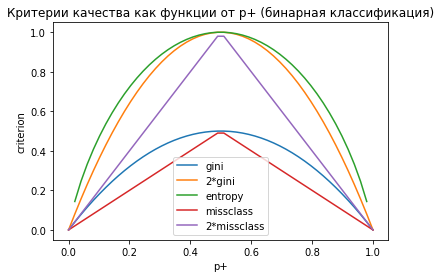

In [2]:
plt.rcParams["figure.figsize"] = (6,4)

x = np.linspace(0,1,50)
plt.plot(x, [2*i*(1-i) for i in x], label = "gini")
plt.plot(x, [4*i*(1-i) for i in x], label = "2*gini")
plt.plot(x, [-i*np.log2(i) - (1-i) * np.log2(1-i) for i in x], label = "entropy")
plt.plot(x, [1 - max(i, 1 - i) for i in x], label="missclass")
plt.plot(x, [2 - 2 * max(i, 1 - i) for i in x], label="2*missclass")
plt.xlabel("p+")
plt.ylabel("criterion")
plt.title("Критерии качества как функции от p+ (бинарная классификация)")
plt.legend()

In [3]:
np.seed = 7
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

first = train_data

# добавляем второй класс в один массив
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

second = np.array([train_data[i] for i in range(100, 200)])



In [4]:
def get_grid(data, eps = 0.01):
    x_min , x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min , y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))



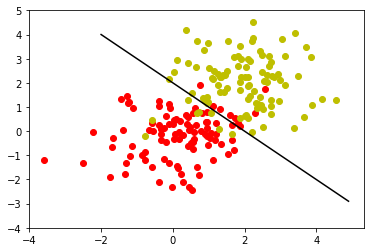

In [5]:
plt.plot(first[:,0], first[:,1], 'r o')
plt.plot(second[:,0], second[:,1], 'y o')
x_l = np.arange(-2,5,0.1)

plt.plot(x_l, 2 - 1*x_l, "k")
plt.ylim(-4,5)
plt.show()


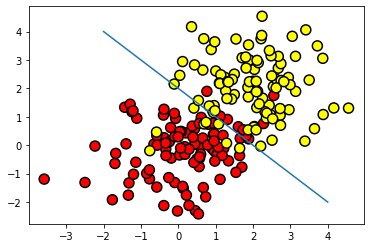

In [6]:

plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)
plt.plot(range(-2, 5), range(4, -3, -1));

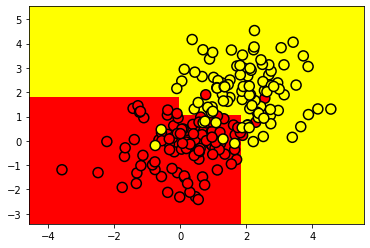

In [7]:
from sklearn.tree import DecisionTreeClassifier

# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=17)

# обучаем дерево
clf_tree.fit(train_data, train_labels)

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

In [8]:
from io import StringIO

import pydotplus

# используем .dot формат для визуализации дерева
from ipywidgets import Image
from sklearn.tree import export_graphviz

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=["x1", "x2"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Image(value=graph.create_png())

In [9]:
data = pd.DataFrame(
    {
        "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)

In [10]:
data


,Возраст,Невозврат кредита
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [11]:
data.sort_values("Возраст")

,Возраст,Невозврат кредита
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [12]:

data["Возраст"].values.reshape(-1,1)
print(data["Возраст"].values)
print(data["Невозврат кредита"].values)

[17 64 18 20 38 49 55 25 29 31 33]
[1 0 1 0 1 0 0 1 1 0 1]


In [13]:
age_tree = DecisionTreeClassifier(random_state = 17)
age_tree.fit(data["Возраст"].values.reshape(-1,1), data["Невозврат кредита"].values)


DecisionTreeClassifier(random_state=17)

In [17]:

dot_data = StringIO()
export_graphviz(age_tree, feature_names=["Возраст"], out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

InvocationException: GraphViz's executables not found

In [19]:
data2 = pd.DataFrame(
    {
        "Возраст": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Зарплата": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Невозврат кредита": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Возраст,Зарплата,Невозврат кредита
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [22]:
age_tree2 = DecisionTreeClassifier(random_state = 17)
age_tree2.fit(data2[["Возраст", "Зарплата"]].values, data["Невозврат кредита"].values)


DecisionTreeClassifier(random_state=17)

In [67]:
from sklearn.tree import DecisionTreeClassifier
dot_data = StringIO()
export_graphviz(
    age_tree2, feature_names=["Возраст", "Зарплата"], out_file=dot_data, filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(value=graph.create_png())

InvocationException: GraphViz's executables not found

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
data = pd.read_csv('../../data/telecom_churn.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/telecom_churn.csv'

In [34]:
n_train = 150
n_test = 1000
noise = 0.1


In [158]:
def fi(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))

def generate(N, noise):
    X = np.random.rand(N) * 10-5
    X = np.sort(X).ravel()
    y = (np.exp(-(X ** 2))+ 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, N))
    X = X.reshape((N, 1))
    return X, y


X_train, y_train = generate(N=n_train, noise=noise)
X_test, y_test = generate(N=n_test, noise=noise)

In [159]:
from sklearn.tree import DecisionTreeRegressor

regressiv_tree = DecisionTreeRegressor(max_depth=10, random_state = 10)
regressiv_tree.fit(X_train, y_train)
regressiv_predict = regressiv_tree.predict(X_test)


-804966.1386331049


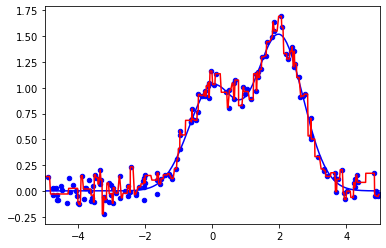

In [160]:
plt.figure()
plt.plot(X_test, fi(X_test), "b")
plt.scatter(X_train, y_train, c="b", s =20)
plt.plot(X_test, regressiv_predict, c = "r")
plt.xlim([-5,5])

mistake = 100*(np.sum(regressiv_predict - f(X_test)))/n_test
print(mistake)


In [111]:
fun = lambda x: x**2
N = 200
def Generate(x, N):
    x = np.sort(x).ravel()
    y = fun(x)
    y = y.reshape((N))
    x = x.reshape((N,1))
    return x,y

In [141]:
x = np.arange(-10,10,0.1)
x_test = np.arange(-10,10,0.2)
x_test,y_test = Generate(x_test, 100)

X, Y = Generate(x, N)


(100, 1)


In [148]:
from sklearn.tree import DecisionTreeRegressor
my_tree = DecisionTreeRegressor(max_depth =10, random_state = 17)

my_tree.fit(X,Y)
y_test = my_tree.predict(x_test)

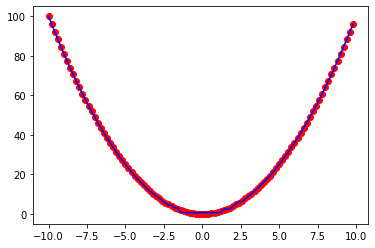

In [150]:

plt.plot(x_test, fun(x_test), 'o r')
plt.plot(x_test, y_test, 'b')